# EDA - Datos socio demográficos y de recursos de salud a nivel de condado de EE. UU. (2018-2019)

In [134]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# 1. Problem statement and data collection

In [135]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
total_data.head()

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0   
2                 12.865239  ...         2373                 19.7   
3                 13.897321  ...         1789                 14.1   
4                 11.901798  ...         4661                 13.5   

   diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
0                   11.9                   13.8             5462   
1                   11.0                   13.1            20520   
2                   18.6                   20.6             3870   
3                   13.2                   14.9             2511   
4                   12.6                   14.5             6017   

   CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
0             3.1               2.9               3.3        1326   
1             3.2               3.0               3.5        5479   
2             4.5               4.2               4.8         887   
3             3.3               3.1               3.6         595   
4             3.4               3.2               3.7        1507   

   Urban_rural_code  
0                 3  
1                 4  
2                 6  
3                 2  
4                 2  

[5 rows x 108 columns]

# 2. Exploration and data cleaning
# 2.1 Understanding the features:

In [136]:
# Obtener las dimensiones
print('Our dataframe contains {} rows, indicating the total number of rentals, and has a shape of {}.'.format(len(total_data), total_data.shape))

Our dataframe contains 3140 rows, indicating the total number of rentals, and has a shape of (3140, 108).


In [137]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


# 2.2 Identifying Null Values and data types for each feature

In [138]:
total_data.isna().sum()[total_data.isna().sum()>0]

Series([], dtype: int64)

# 2.3 Looking for duplicated and dropping them, if any.

In [139]:
#Eliminamos los duplicados
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0   
2                 12.865239  ...         2373                 19.7   
3                 13.897321  ...         1789                 14.1   
4                 11.901798  ...         4661                 13.5   

   diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
0                   11.9                   13.8             5462   
1                   11.0                   13.1            20520   
2                   18.6                   20.6             3870   
3                   13.2                   14.9             2511   
4                   12.6                   14.5             6017   

   CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
0             3.1               2.9               3.3        1326   
1             3.2               3.0               3.5        5479   
2             4.5               4.2               4.8         887   
3             3.3               3.1               3.6         595   
4             3.4               3.2               3.7        1507   

   Urban_rural_code  
0                 3  
1                 4  
2                 6  
3                 2  
4                 2  

[5 rows x 108 columns]

# 2.4 Dealing with null values

In [140]:
#Sacamos el porcentaje de valores NaN
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

fips                      0.0
TOT_POP                   0.0
0-9                       0.0
0-9 y/o % of total pop    0.0
19-Oct                    0.0
                         ... 
CKD_prevalence            0.0
CKD_Lower 95% CI          0.0
CKD_Upper 95% CI          0.0
CKD_number                0.0
Urban_rural_code          0.0
Length: 108, dtype: float64

# 3. Univariate Analysis
# 3.1 Dividing our dataset into categorial and numerical.

In [141]:
#Analizamos los tipos de información que tenemos
total_data.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [142]:
#keep_columns = [
    #"TOT_POP", "COUNTY_NAME", "STATE_NAME", "0-9", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "R_NET_MIG_2018", "PCTPOVALL_2018",
    #"MEDHHINC_2018", "Civilian_labor_force_2018", "Unemployed_2018", "Employed_2018", "Active Physicians per 100000 Population 2018 (AAMC)", "Active General Surgeons per 100000 Population 2018 (AAMC)", "Total nurse practitioners (2019)", 
    #"Total physician assistants (2019)", "Total Hospitals (2019)", "Internal Medicine Primary Care (2019)", 
    #"Family Medicine/General Practice Primary Care (2019)", "Total Specialist Physicians (2019)", 
    #"Population Aged 60+", "anycondition_number", "Heart disease_number", "diabetes_number", "Obesity_number", "COPD_number", "COPD_prevalence", "CKD_number", "Urban_rural_code"
#]

#df_filtered = total_data[keep_columns]

In [143]:
#Dividimos el dataframe original por valores numéricos y categóricos
num = ['int64', 'float64']
cat = ['O']

df_num = total_data.select_dtypes(num)
df_cat = total_data.select_dtypes(cat)

In [144]:
df_cat.head(3)

COUNTY_NAME STATE_NAME
0     Autauga    Alabama
1     Baldwin    Alabama
2     Barbour    Alabama

# 3.2 Categorical Variable Analysis

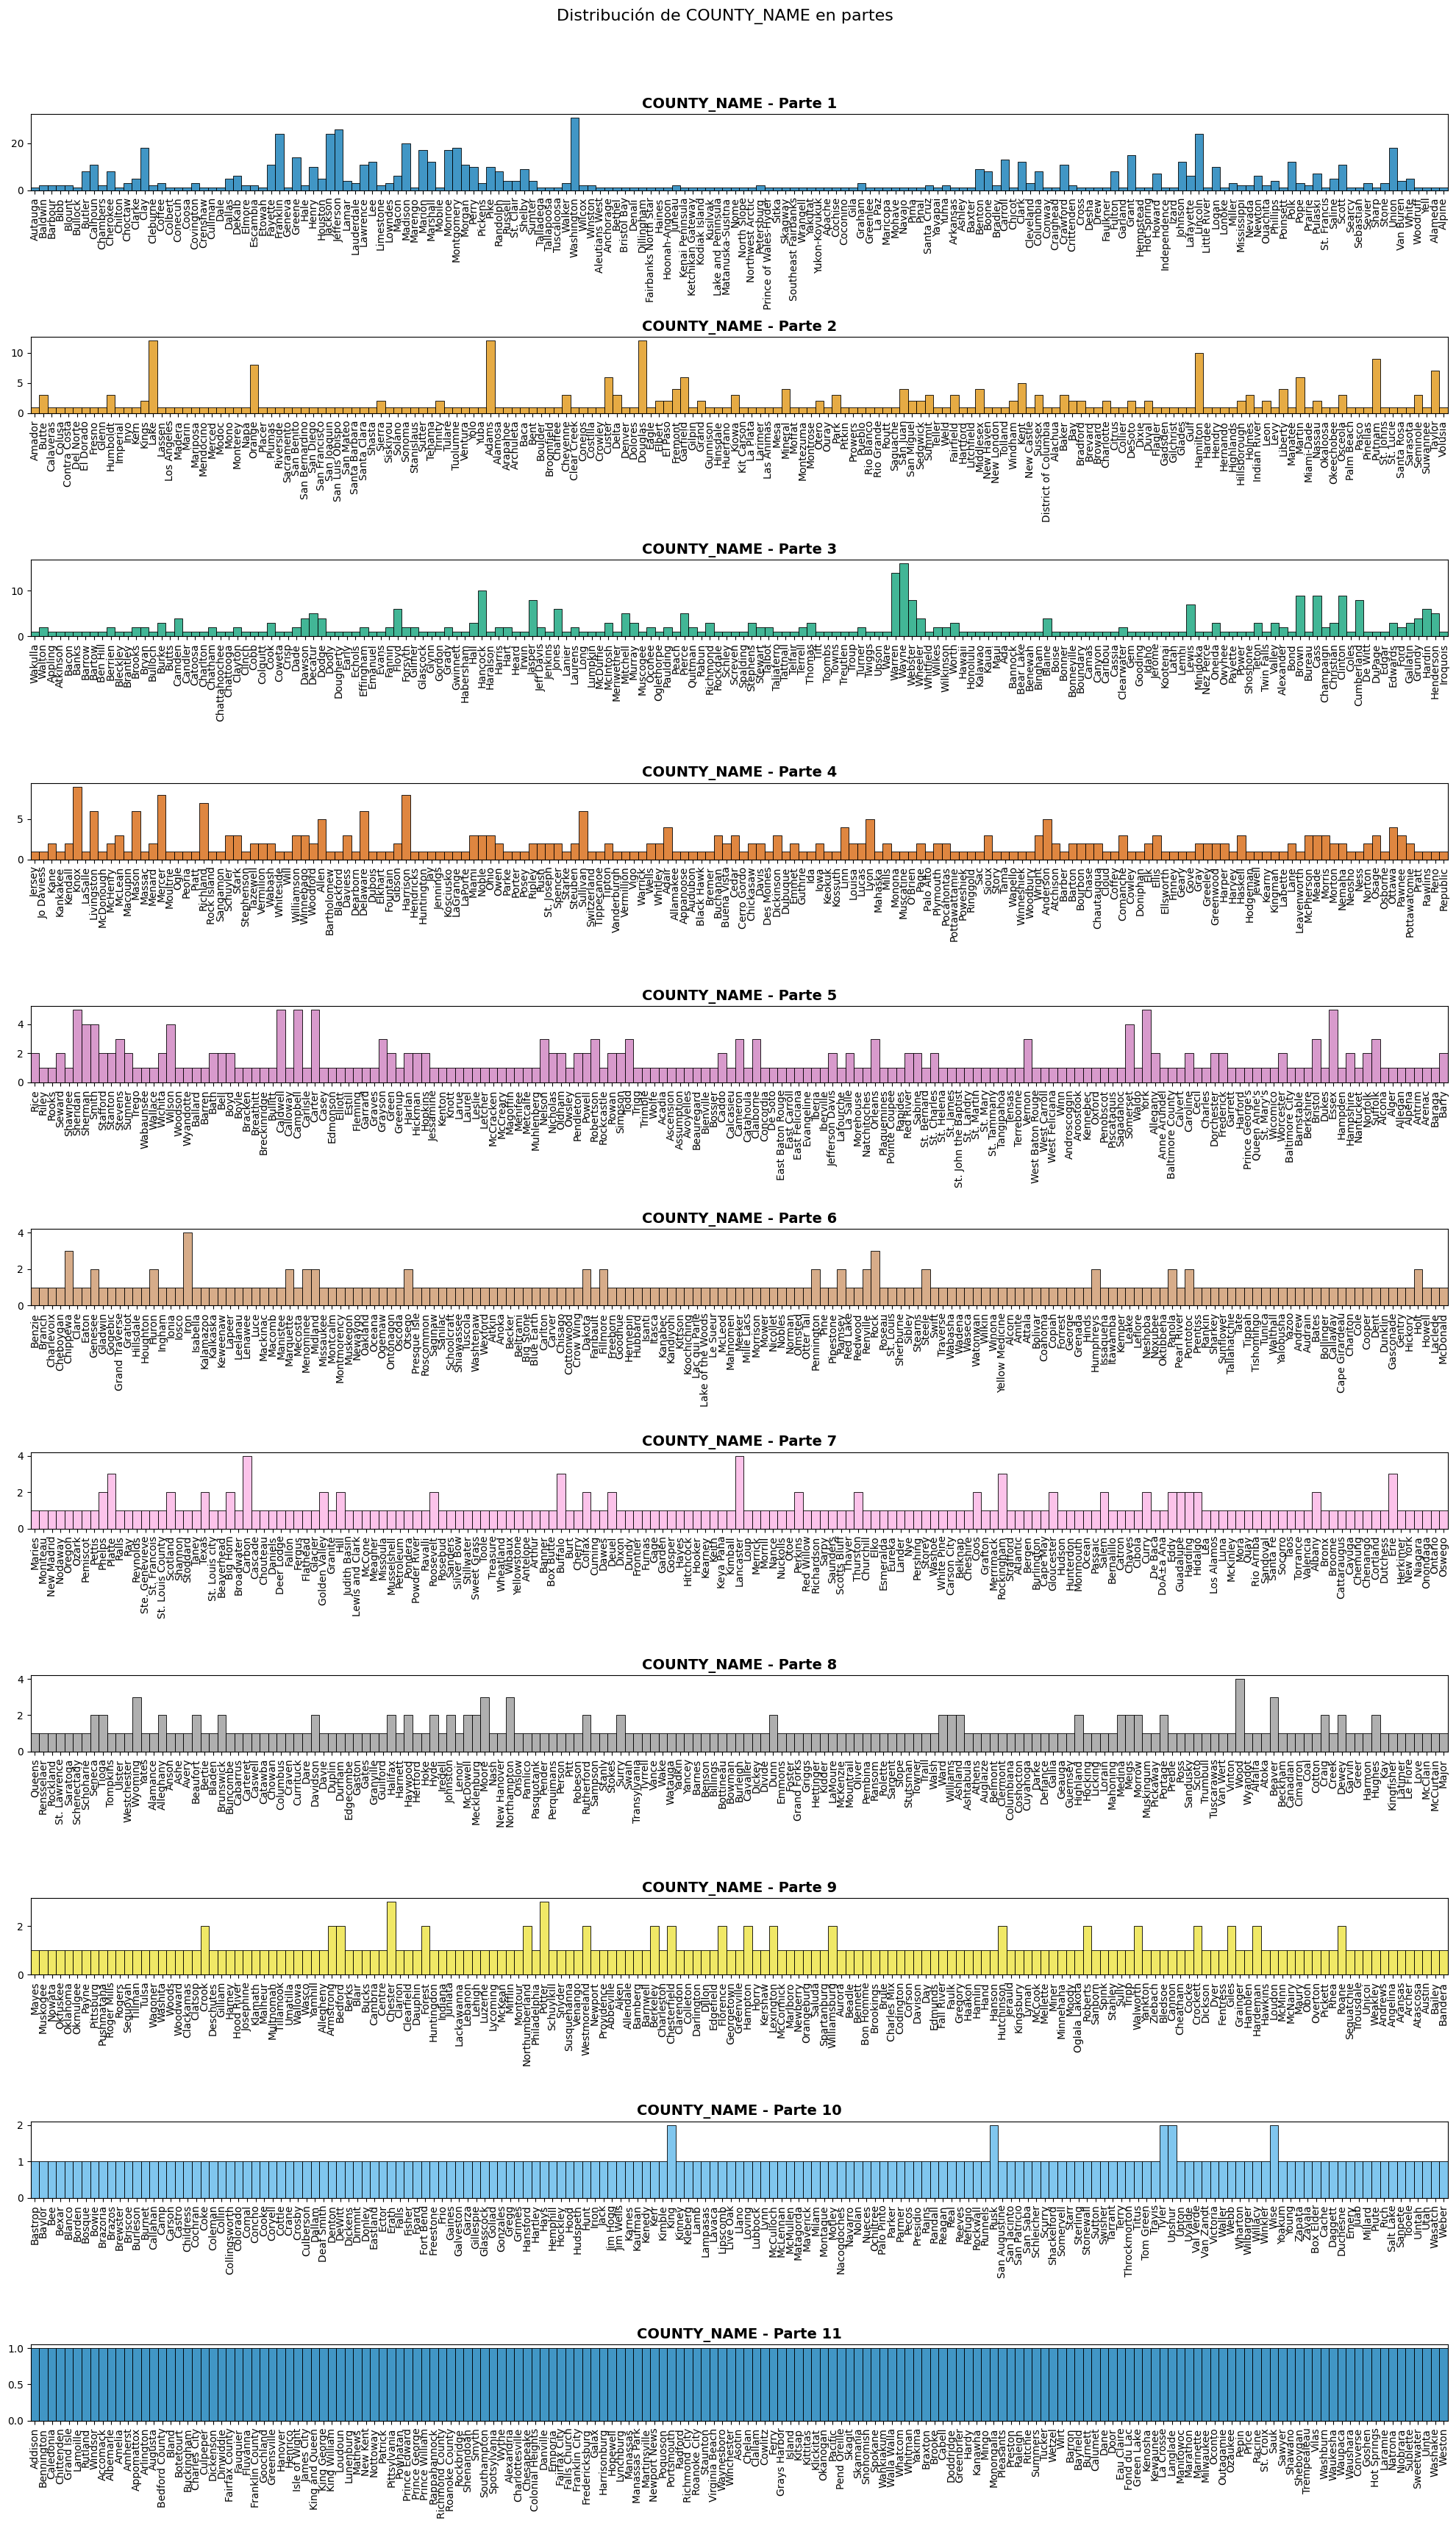

In [145]:
county_names = df_cat['COUNTY_NAME'].unique()
num_particiones = 11
divisiones = np.array_split(county_names, num_particiones)

fig, axis = plt.subplots(num_particiones, 1, figsize=(20, 35))
fig.suptitle("Distribución de COUNTY_NAME en partes", fontsize=16)

colores = sns.color_palette("colorblind", num_particiones)

for i, division in enumerate(divisiones):
    subset = df_cat[df_cat['COUNTY_NAME'].isin(division)]
    ax = axis[i]
    sns.histplot(data=subset, x="COUNTY_NAME", ax=ax, color=colores[i]).set(xlabel=None, ylabel=None)
    ax.set_title(f"COUNTY_NAME - Parte {i+1}", fontsize=14, fontweight='bold')
    ax.tick_params(axis='x', rotation=90)
    ax.margins(x=0)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

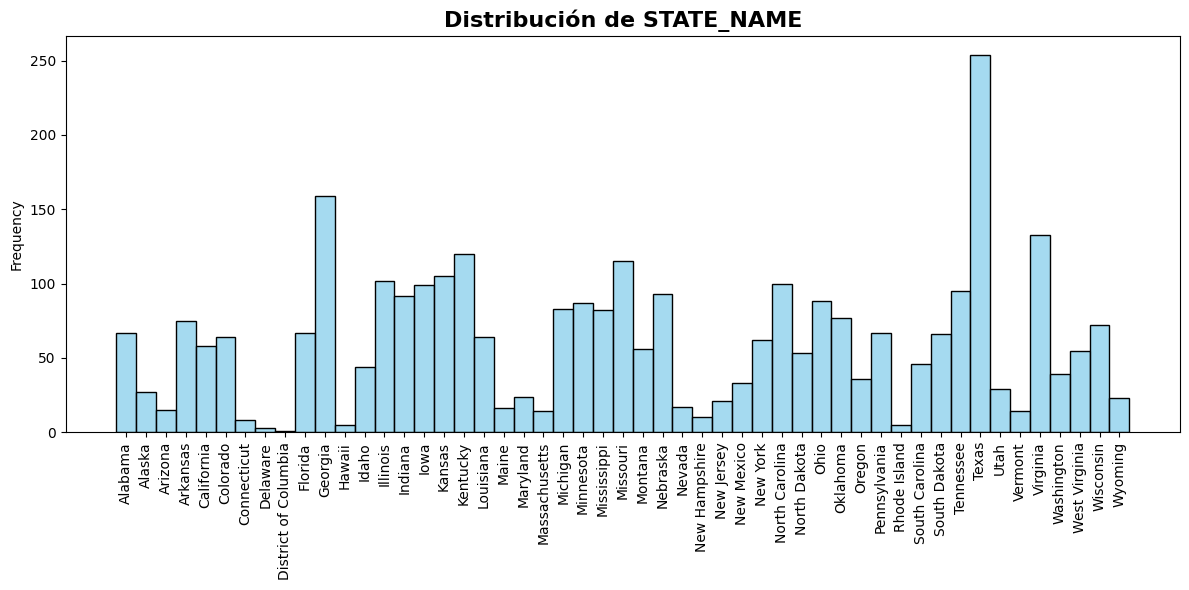

In [146]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df_cat, x="STATE_NAME", color="skyblue").set(xlabel=None, ylabel="Frequency")
plt.title("Distribución de STATE_NAME", fontsize=16, fontweight='bold')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# 3.3 Numerical Variable Analysis

In [147]:
df_num.head()

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0   
2                 12.865239  ...         2373                 19.7   
3                 13.897321  ...         1789                 14.1   
4                 11.901798  ...         4661                 13.5   

   diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
0                   11.9                   13.8             5462   
1                   11.0                   13.1            20520   
2                   18.6                   20.6             3870   
3                   13.2                   14.9             2511   
4                   12.6                   14.5             6017   

   CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
0             3.1               2.9               3.3        1326   
1             3.2               3.0               3.5        5479   
2             4.5               4.2               4.8         887   
3             3.3               3.1               3.6         595   
4             3.4               3.2               3.7        1507   

   Urban_rural_code  
0                 3  
1                 4  
2                 6  
3                 2  
4                 2  

[5 rows x 106 columns]

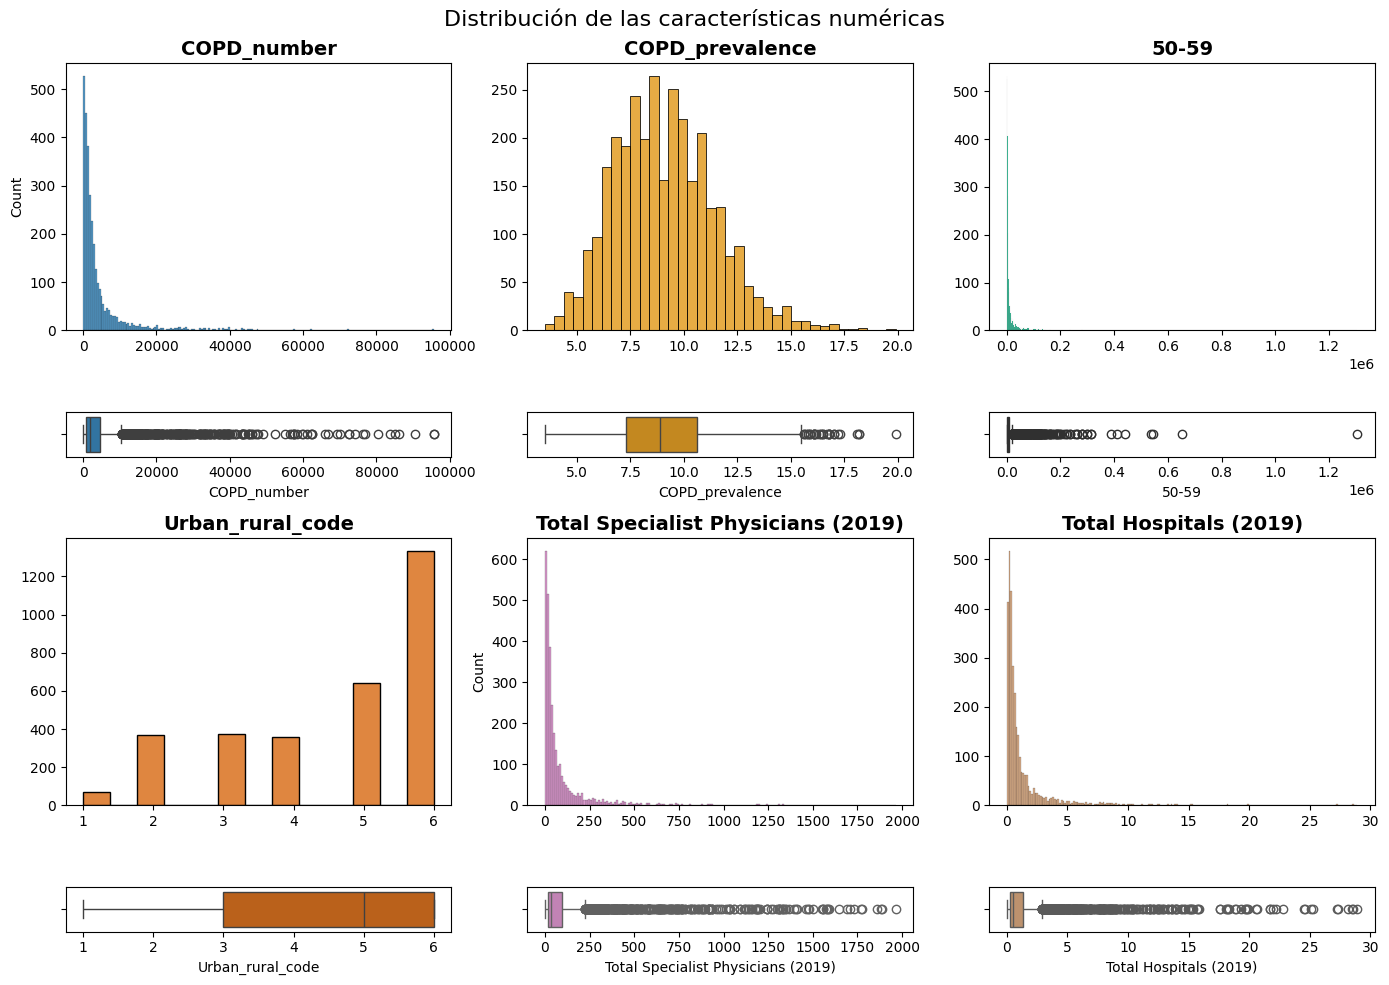

In [148]:
#Analisis con histogramas y boxplot de las características numéricas
fig, axis = plt.subplots(4, 3, figsize = (14, 10), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})
fig.suptitle("Distribución de las características numéricas", fontsize=16)

sns.histplot(ax = axis[0, 0], data = df_num[df_num["COPD_number"] < 100000], x = "COPD_number").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_num[df_num["COPD_number"] < 100000], x = "COPD_number")

sns.histplot(ax = axis[0, 1], data = df_num, x = "COPD_prevalence", color=sns.color_palette("colorblind")[1]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df_num, x = "COPD_prevalence", color=sns.color_palette("colorblind")[1])

sns.histplot(ax = axis[0, 2], data = df_num, x = "50-59", color=sns.color_palette("colorblind")[2]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df_num, x = "50-59", color=sns.color_palette("colorblind")[2])

sns.histplot(ax = axis[2, 0], data = df_num, x = "Urban_rural_code", color=sns.color_palette("colorblind")[3]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = df_num, x = "Urban_rural_code", color=sns.color_palette("colorblind")[3])

sns.histplot(ax = axis[2, 1], data = df_num[df_num["Total Specialist Physicians (2019)"] < 2000], x = "Total Specialist Physicians (2019)", color=sns.color_palette("colorblind")[4]).set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = df_num[df_num["Total Specialist Physicians (2019)"] < 2000], x = "Total Specialist Physicians (2019)", color=sns.color_palette("colorblind")[4])

sns.histplot(ax = axis[2, 2], data = df_num[df_num["Total Hospitals (2019)"] < 30], x = "Total Hospitals (2019)", color=sns.color_palette("colorblind")[5]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = df_num[df_num["Total Hospitals (2019)"] < 30], x = "Total Hospitals (2019)", color=sns.color_palette("colorblind")[5])

axis[0, 0].set_title("COPD_number", fontsize=14, fontweight='bold')
axis[0, 1].set_title("COPD_prevalence", fontsize=14, fontweight='bold')
axis[0, 2].set_title("50-59", fontsize=14, fontweight='bold')
axis[2, 0].set_title("Urban_rural_code", fontsize=14, fontweight='bold')
axis[2, 1].set_title("Total Specialist Physicians (2019)", fontsize=14, fontweight='bold')
axis[2, 2].set_title("Total Hospitals (2019)", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 4. Multivariate Analysis

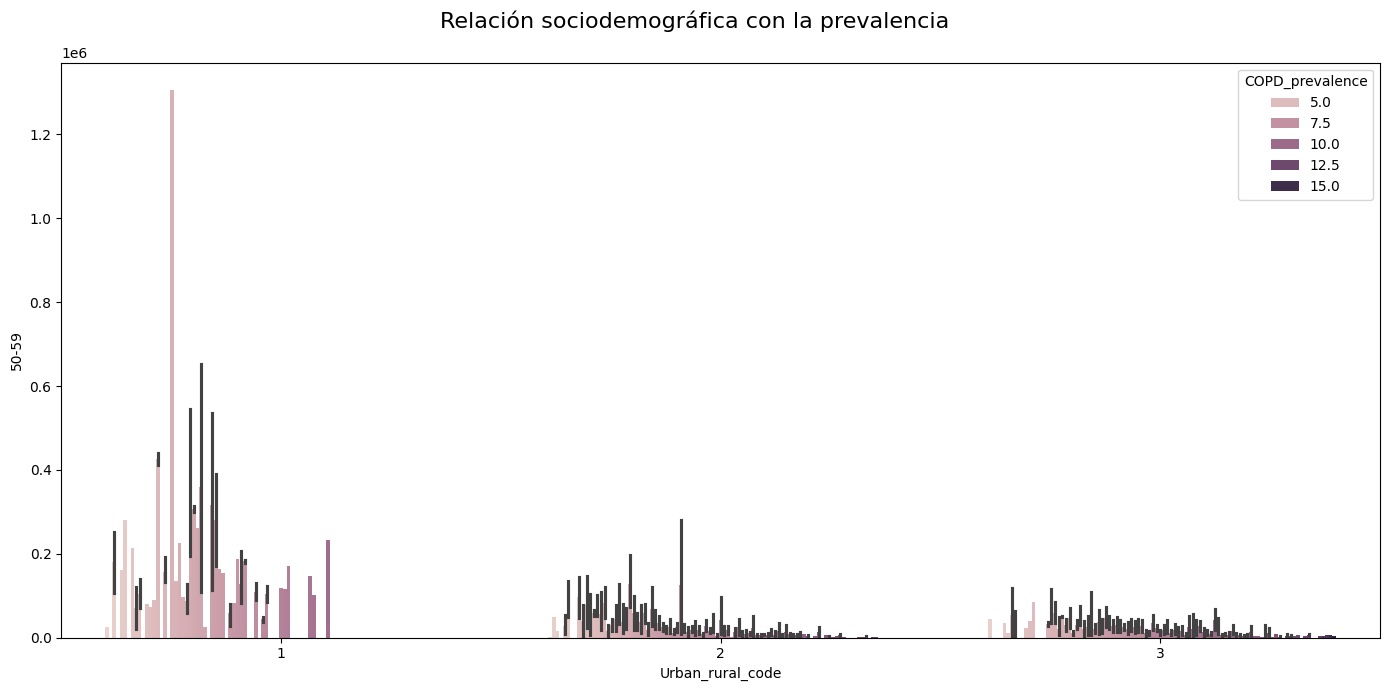

In [149]:
#Análisis combinando varias variables
fig, axis = plt.subplots(figsize = (14, 7))
fig.suptitle("Relación sociodemográfica con la prevalencia", fontsize=16)

sns.barplot(data = df_num[df_num["Urban_rural_code"] < 4], x = "Urban_rural_code", y = "50-59", hue = "COPD_prevalence")

plt.tight_layout()
plt.show()


Conclusiones:

- El gráfico sugiere que la prevalencia de EPOC está más concentrada en áreas urbanas, afectando principalmente a la población en edades entre 50 y 59 años.
- Las áreas menos urbanizadas muestran una menor prevalencia, lo que podría estar relacionado con diferencias en el **estilo de vida, exposición ambiental, y acceso a servicios de salud**.

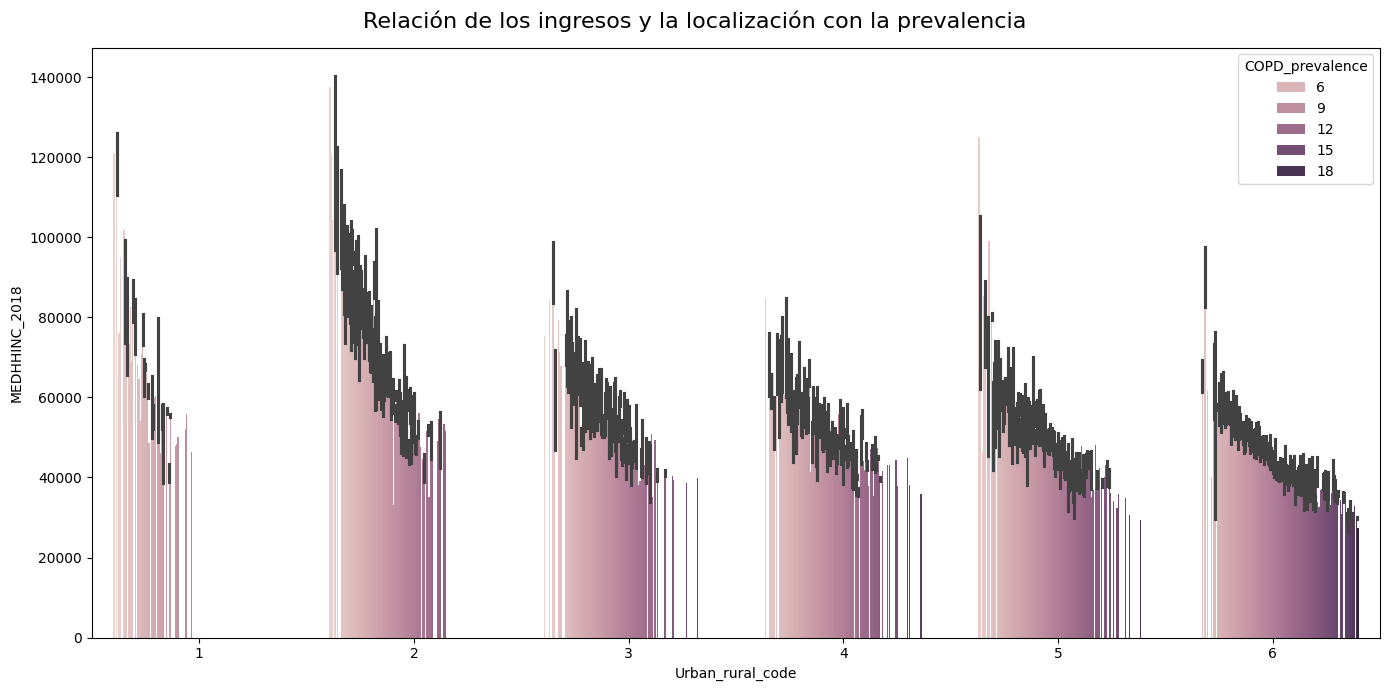

In [150]:
fig, axis = plt.subplots(figsize = (14, 7))
fig.suptitle("Relación de los ingresos y la localización con la prevalencia", fontsize=16)

sns.barplot(data = df_num, x = "Urban_rural_code", y = "MEDHHINC_2018", hue = "COPD_prevalence")

plt.tight_layout()
plt.show()

Se observa lo siguiente:

- Hay una notable variabilidad en la prevalencia de EPOC dentro de cada categoría de urbanización, pero la tendencia general es que las áreas con **menor ingreso** presentan una mayor prevalencia de EPOC.
- Esta tendencia puede estar vinculada a factores socioeconómicos, como el acceso limitado a servicios de salud, mayor exposición a contaminantes rurales (e.g., polvo agrícola), o mayores tasas de tabaquismo en comunidades con menor ingreso.
- Áreas rurales muestran tanto **menores ingresos** como mayor prevalencia de EPOC, lo que podría sugerir que **factores como el acceso limitado a atención médica y condiciones socioeconómicas más desfavorables** están influyendo en los resultados.
- En áreas urbanas, a pesar de los **altos ingresos**, la prevalencia de EPOC es relativamente baja, lo que puede indicar un **mejor acceso a servicios de salud**, mayor conciencia sobre los factores de riesgo, o mejor calidad del aire en ciertas zonas urbanas.

# 4.1 Encoding Categorical Values and Saving JSON files

In [151]:
cn = list(total_data['COUNTY_NAME'].unique())
COUNTY_NAME_encoded = dict(zip(cn, list(range(len(cn)))))

with open('../data/interim/COUNTY_NAME_encoded.json', 'w') as f: 
    json.dump(COUNTY_NAME_encoded, f)

In [152]:
sn = list(total_data['STATE_NAME'].unique())
STATE_NAME_encoded = dict(zip(sn, list(range(len(sn)))))

with open('../data/interim/STATE_NAME_encoded.json', 'w') as f:
    json.dump(STATE_NAME_encoded, f)

In [153]:
#Hacemos una copia del data frame con outliers
df_enc = total_data.copy()

In [154]:
df_enc['COUNTY_NAME_encoded'] = df_enc['COUNTY_NAME'].map(COUNTY_NAME_encoded)
df_enc['STATE_NAME_encoded'] = df_enc['STATE_NAME'].map(STATE_NAME_encoded)

df_enc.drop(columns=['COUNTY_NAME', 'STATE_NAME'], inplace=True)
df_enc.head(3)

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   

   30-39 y/o % of total pop  ...  diabetes_Lower 95% CI  \
0                 12.749771  ...                   11.9   
1                 11.564429  ...                   11.0   
2                 12.865239  ...                   18.6   

   diabetes_Upper 95% CI  diabetes_number  CKD_prevalence  CKD_Lower 95% CI  \
0                   13.8             5462             3.1               2.9   
1                   13.1            20520             3.2               3.0   
2                   20.6             3870             4.5               4.2   

   CKD_Upper 95% CI  CKD_number  Urban_rural_code  COUNTY_NAME_encoded  \
0               3.3        1326                 3                    0   
1               3.5        5479                 4                    1   
2               4.8         887                 6                    2   

   STATE_NAME_encoded  
0                   0  
1                   0  
2                   0  

[3 rows x 108 columns]

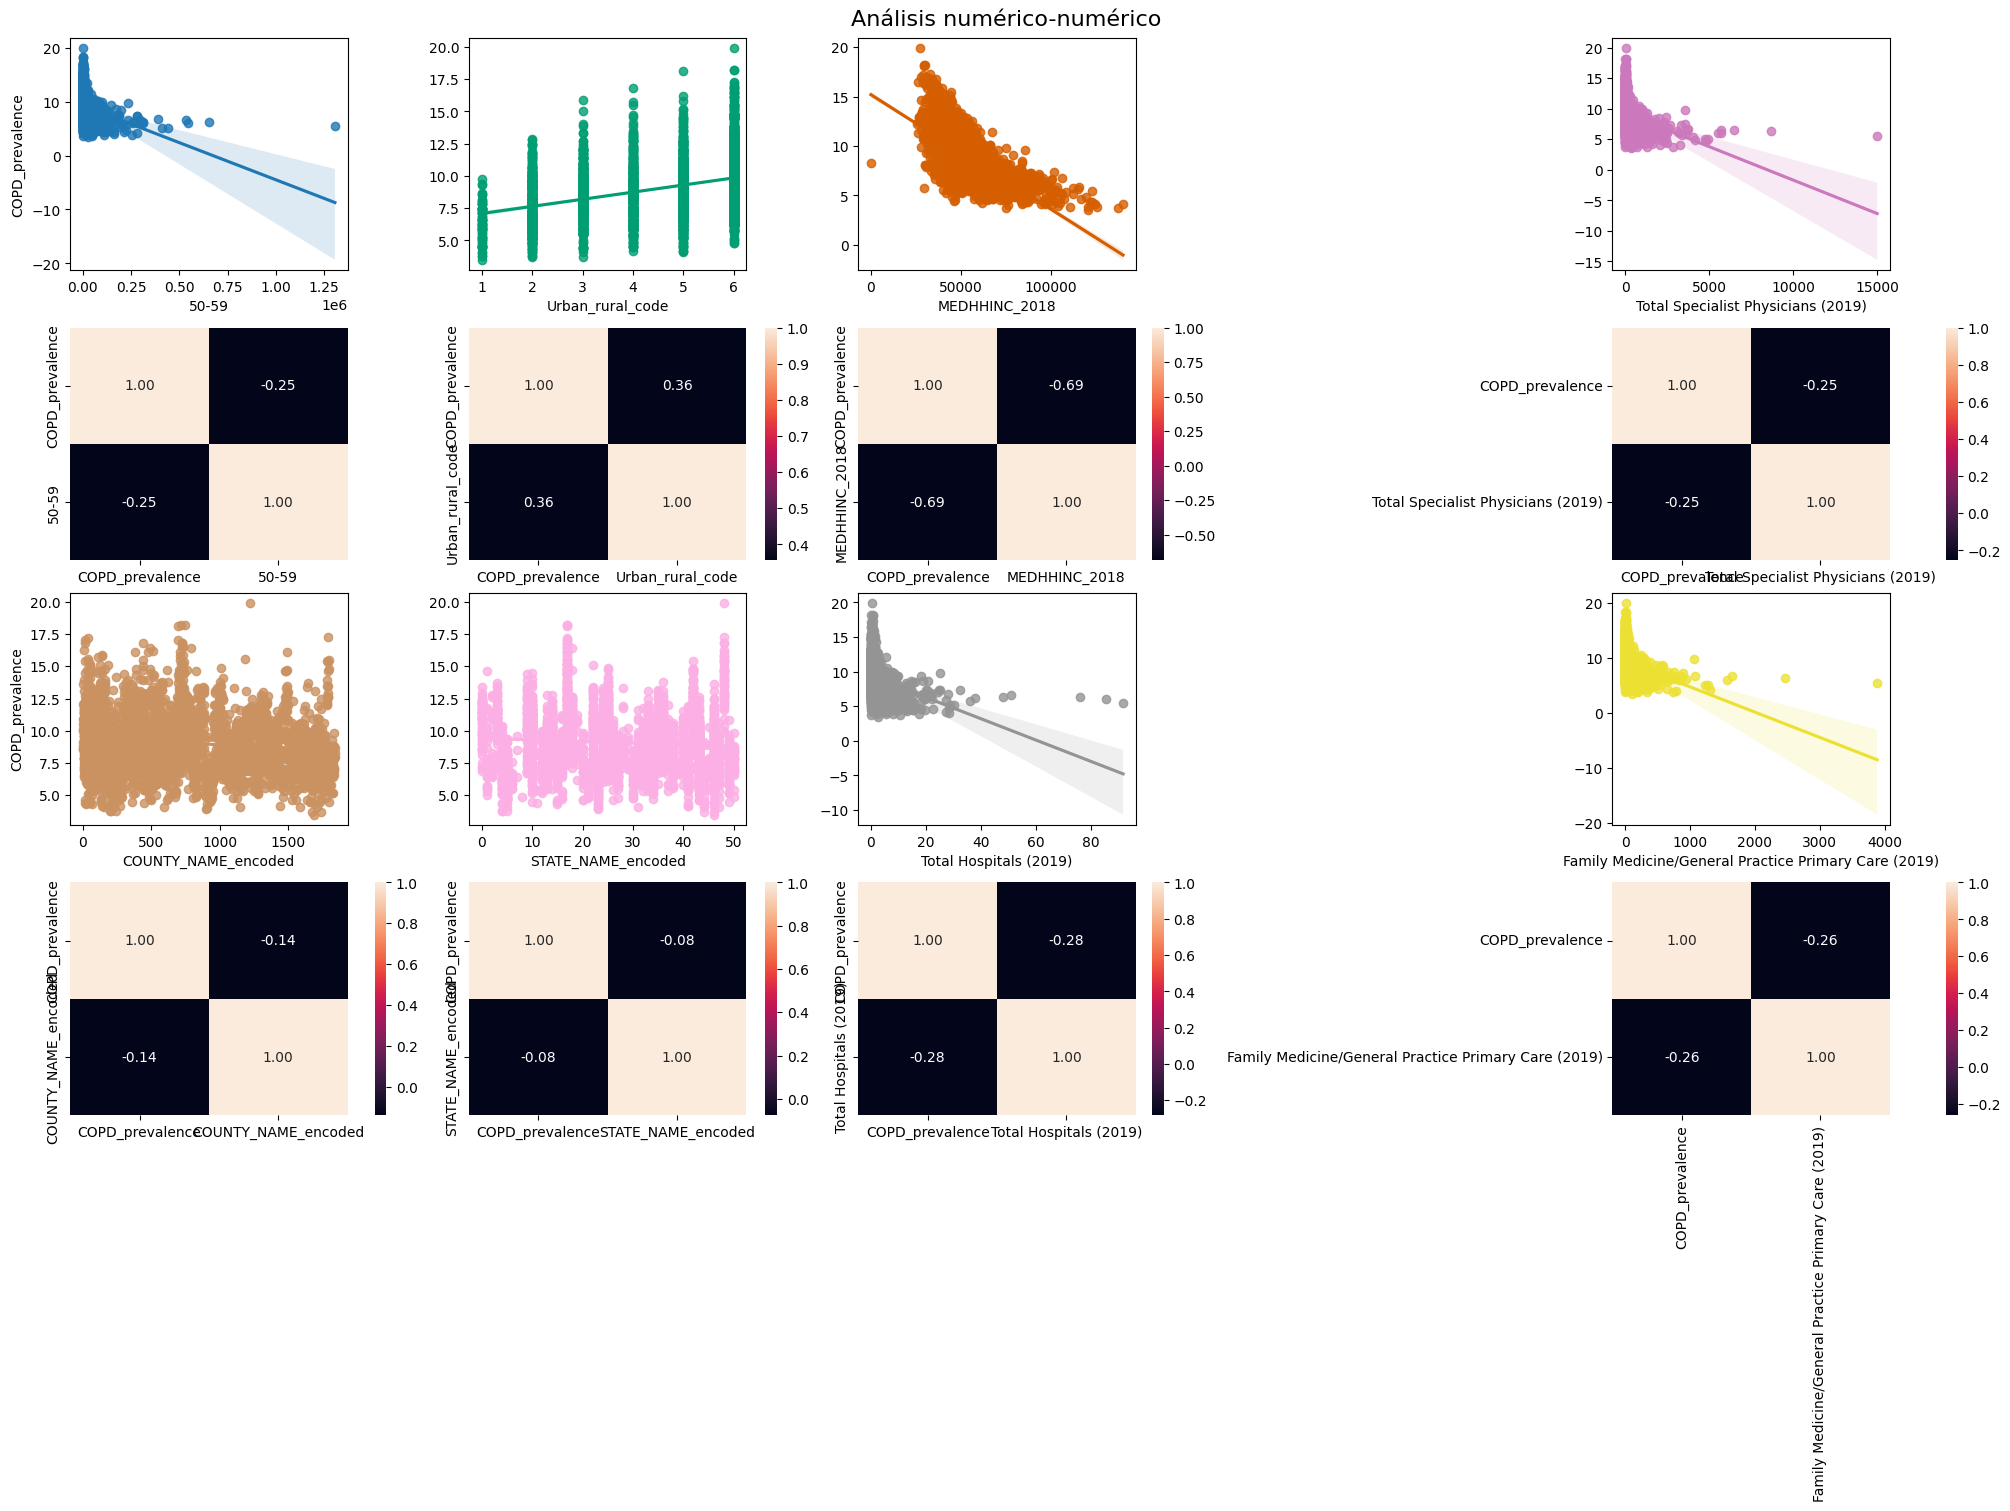

In [155]:
#Analisis de varias variables pt.2
fig, axis = plt.subplots(4, 4, figsize = (20, 15), constrained_layout=True)
fig.suptitle("Análisis numérico-numérico", fontsize=16)


sns.regplot(ax = axis[0, 0], data = df_enc, x = "50-59", y = "COPD_prevalence")
sns.heatmap(df_enc[["COPD_prevalence", "50-59"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df_enc, x = "Urban_rural_code", y = "COPD_prevalence", color=sns.color_palette("colorblind")[2]).set(ylabel = None)
sns.heatmap(df_enc[["COPD_prevalence", "Urban_rural_code"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = df_enc, x = "MEDHHINC_2018", y = "COPD_prevalence", color=sns.color_palette("colorblind")[3]).set(ylabel = None)
sns.heatmap(df_enc[["COPD_prevalence", "MEDHHINC_2018"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2]).set(ylabel = None)

sns.regplot(ax = axis[0, 3], data = df_enc, x = "Total Specialist Physicians (2019)", y = "COPD_prevalence", color=sns.color_palette("colorblind")[4]).set(ylabel = None)
sns.heatmap(df_enc[["COPD_prevalence", "Total Specialist Physicians (2019)"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3]).set(ylabel = None)

sns.regplot(ax = axis[2, 0], data = df_enc, x = "COUNTY_NAME_encoded", y = "COPD_prevalence", color=sns.color_palette("colorblind")[5])
sns.heatmap(df_enc[["COPD_prevalence", "COUNTY_NAME_encoded"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = df_enc, x = "STATE_NAME_encoded", y = "COPD_prevalence", color=sns.color_palette("colorblind")[6]).set(ylabel = None)
sns.heatmap(df_enc[["COPD_prevalence", "STATE_NAME_encoded"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1]).set(ylabel = None)

sns.regplot(ax = axis[2, 2], data = df_enc, x = "Total Hospitals (2019)", y = "COPD_prevalence", color=sns.color_palette("colorblind")[7]).set(ylabel = None)
sns.heatmap(df_enc[["COPD_prevalence", "Total Hospitals (2019)"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2]).set(ylabel = None)

sns.regplot(ax = axis[2, 3], data = df_enc, x = "Family Medicine/General Practice Primary Care (2019)", y = "COPD_prevalence", color=sns.color_palette("colorblind")[8]).set(ylabel = None)
sns.heatmap(df_enc[["COPD_prevalence", "Family Medicine/General Practice Primary Care (2019)"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 3]).set(ylabel = None)


plt.show()

analisis

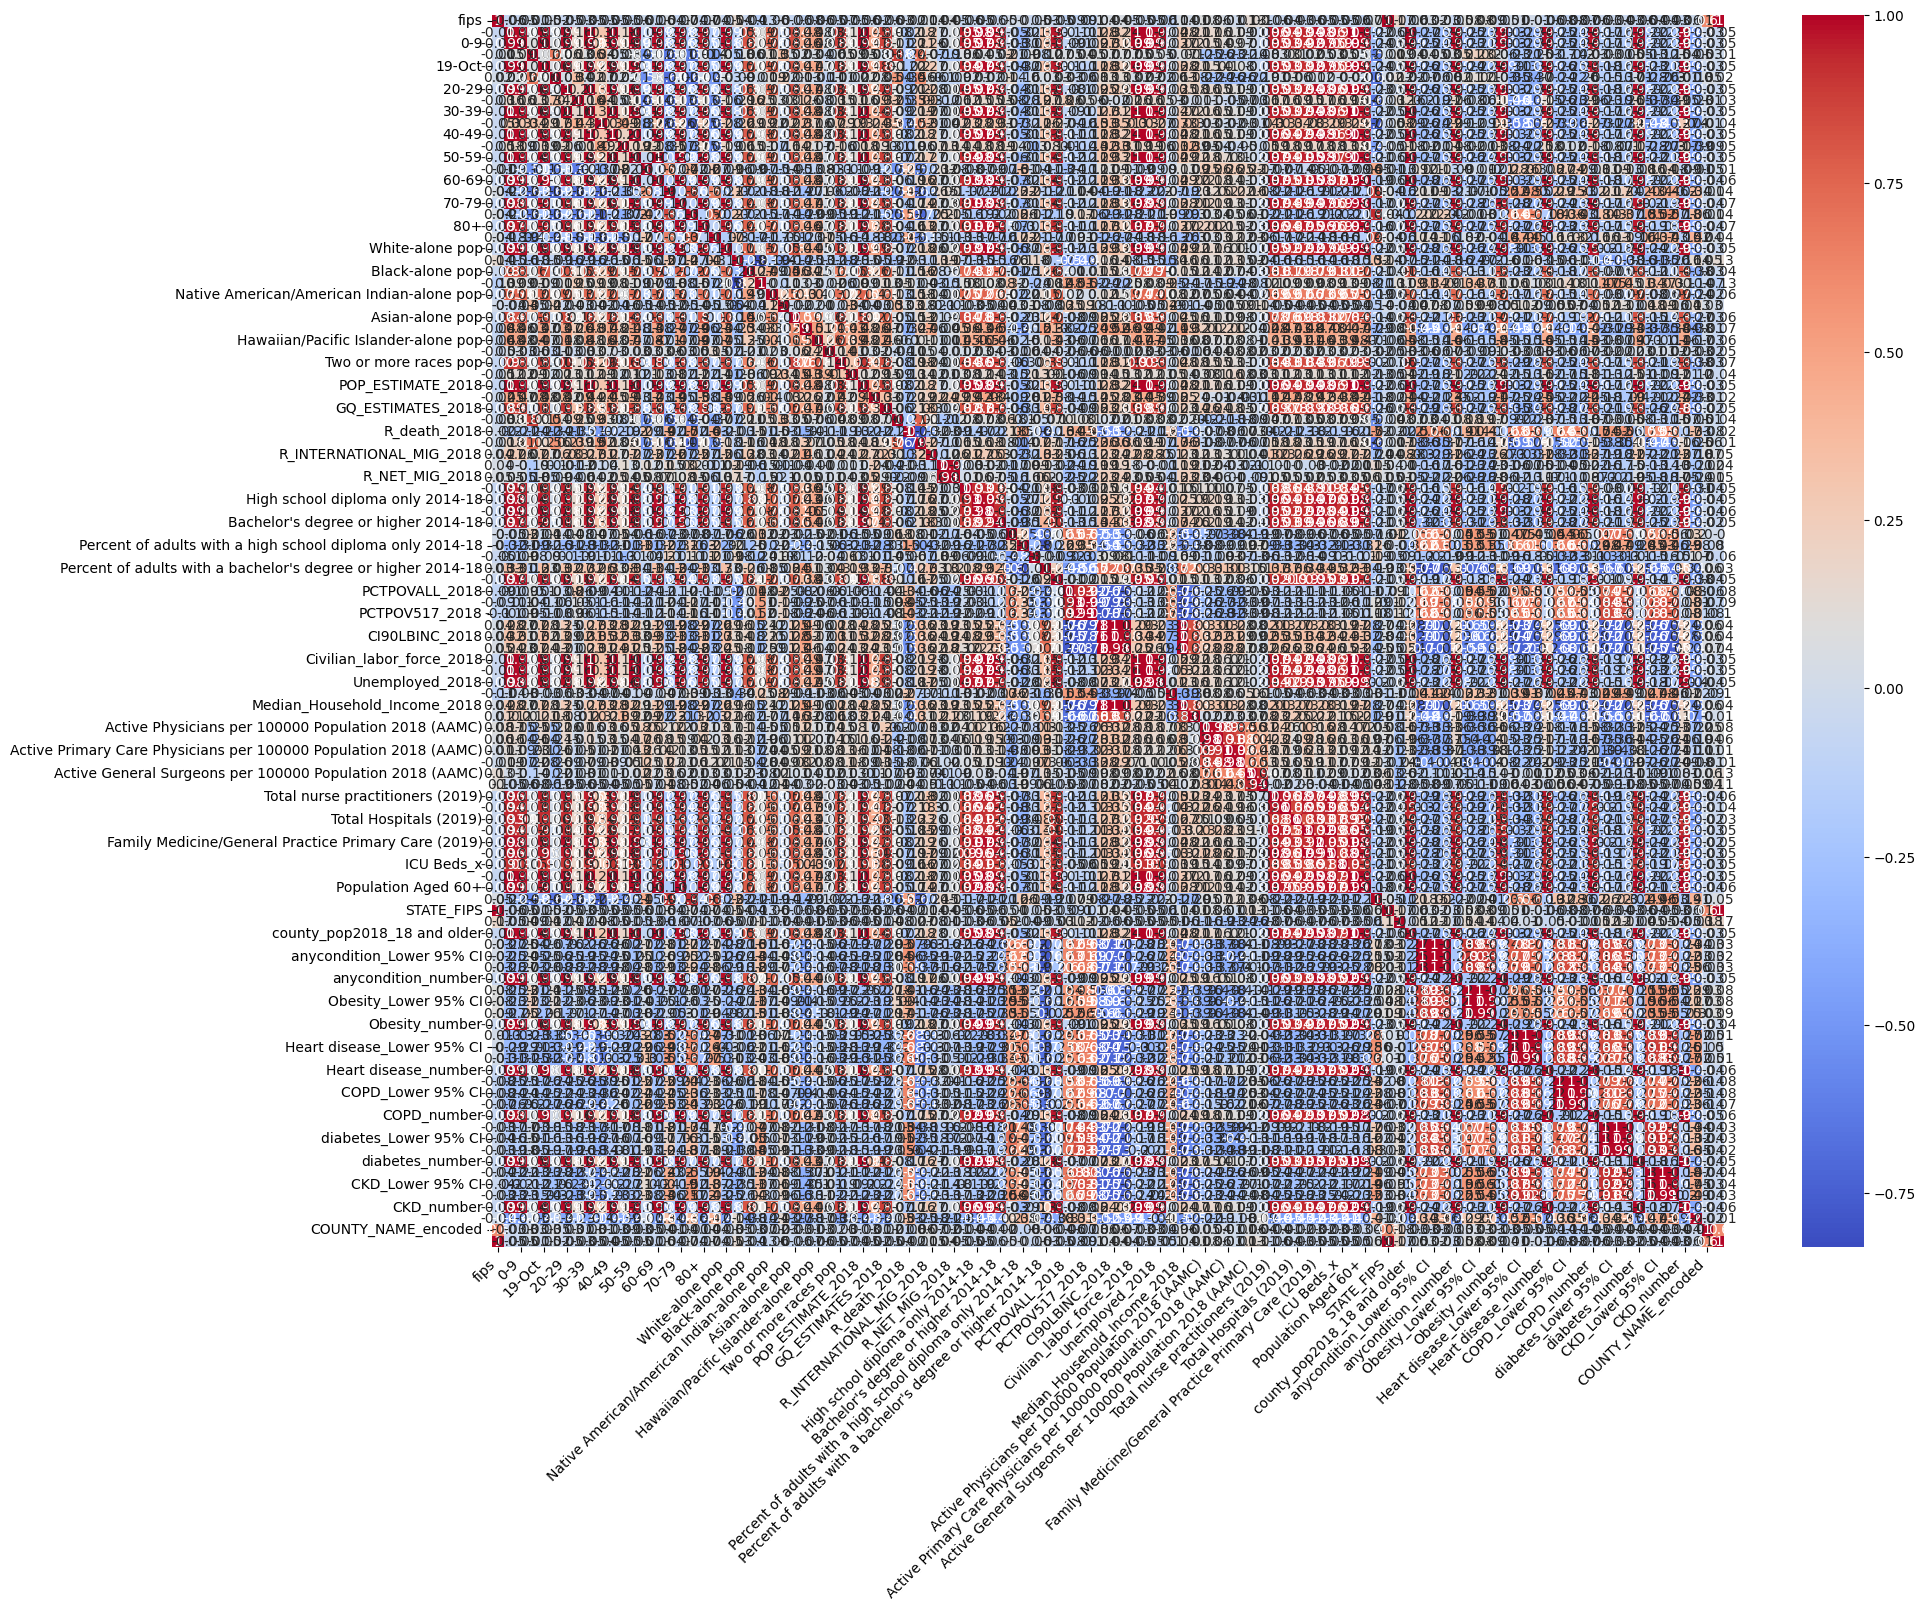

In [156]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_enc.corr().round(2), annot=True, cmap='coolwarm', square=True)
plt.xticks(rotation=45, ha='right')

plt.show()

# 5. Feature Engineering
# 5.1 Outlier Analysis

In [157]:
#Análisis de outliers
df_enc.describe().round(2)

fips      TOT_POP        0-9  0-9 y/o % of total pop      19-Oct  \
count   3140.00      3140.00     3140.0                 3140.00     3140.00   
mean   30401.64    104189.41    12740.3                   11.87    13367.98   
std    15150.56    333583.40    41807.3                    2.12    42284.39   
min     1001.00        88.00        0.0                    0.00        0.00   
25%    18180.50     10963.25     1280.5                   10.59     1374.50   
50%    29178.00     25800.50     3057.0                   11.80     3274.00   
75%    45081.50     67913.00     8097.0                   12.95     8822.25   
max    56045.00  10105518.00  1208253.0                   25.46  1239139.00   

       10-19 y/o % of total pop       20-29  20-29 y/o % of total pop  \
count                   3140.00     3140.00                   3140.00   
mean                      12.69    14469.33                     12.28   
std                        1.82    49577.73                      3.13   
min                        0.00        0.00                      0.00   
25%                       11.67     1263.75                     10.50   
50%                       12.69     3108.00                     11.77   
75%                       13.66     8976.25                     13.18   
max                       23.30  1557073.00                     37.57   

            30-39  30-39 y/o % of total pop  ...  diabetes_Lower 95% CI  \
count     3140.00                   3140.00  ...                3140.00   
mean     13916.49                     11.75  ...                  12.09   
std      48990.95                      1.70  ...                   2.62   
min         11.00                      6.09  ...                   5.50   
25%       1232.75                     10.69  ...                  10.30   
50%       3000.50                     11.58  ...                  11.80   
75%       8314.25                     12.64  ...                  13.70   
max    1501844.00                     22.23  ...                  24.20   

       diabetes_Upper 95% CI  diabetes_number  CKD_prevalence  \
count                3140.00          3140.00         3140.00   
mean                   14.05          9326.58            3.45   
std                     2.82         29754.60            0.57   
min                     6.70            11.00            1.80   
25%                    12.10          1187.75            3.10   
50%                    13.80          2743.00            3.40   
75%                    15.90          6679.25            3.80   
max                    27.00        952335.00            6.20   

       CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  Urban_rural_code  \
count           3140.00           3140.00     3140.00           3140.00   
mean               3.21              3.71     2466.23              4.64   
std                0.53              0.61     7730.42              1.51   
min                1.70              1.90        3.00              1.00   
25%                2.90              3.30      314.75              3.00   
50%                3.20              3.70      718.00              5.00   
75%                3.50              4.10     1776.25              6.00   
max                5.80              6.60   237766.00              6.00   

       COUNTY_NAME_encoded  STATE_NAME_encoded  
count              3140.00             3140.00  
mean                688.48               26.25  
std                 541.77               14.26  
min                   0.00                0.00  
25%                 182.00               14.00  
50%                 564.00               25.00  
75%                1129.25               40.00  
max                1840.00               50.00  

[8 rows x 108 columns]

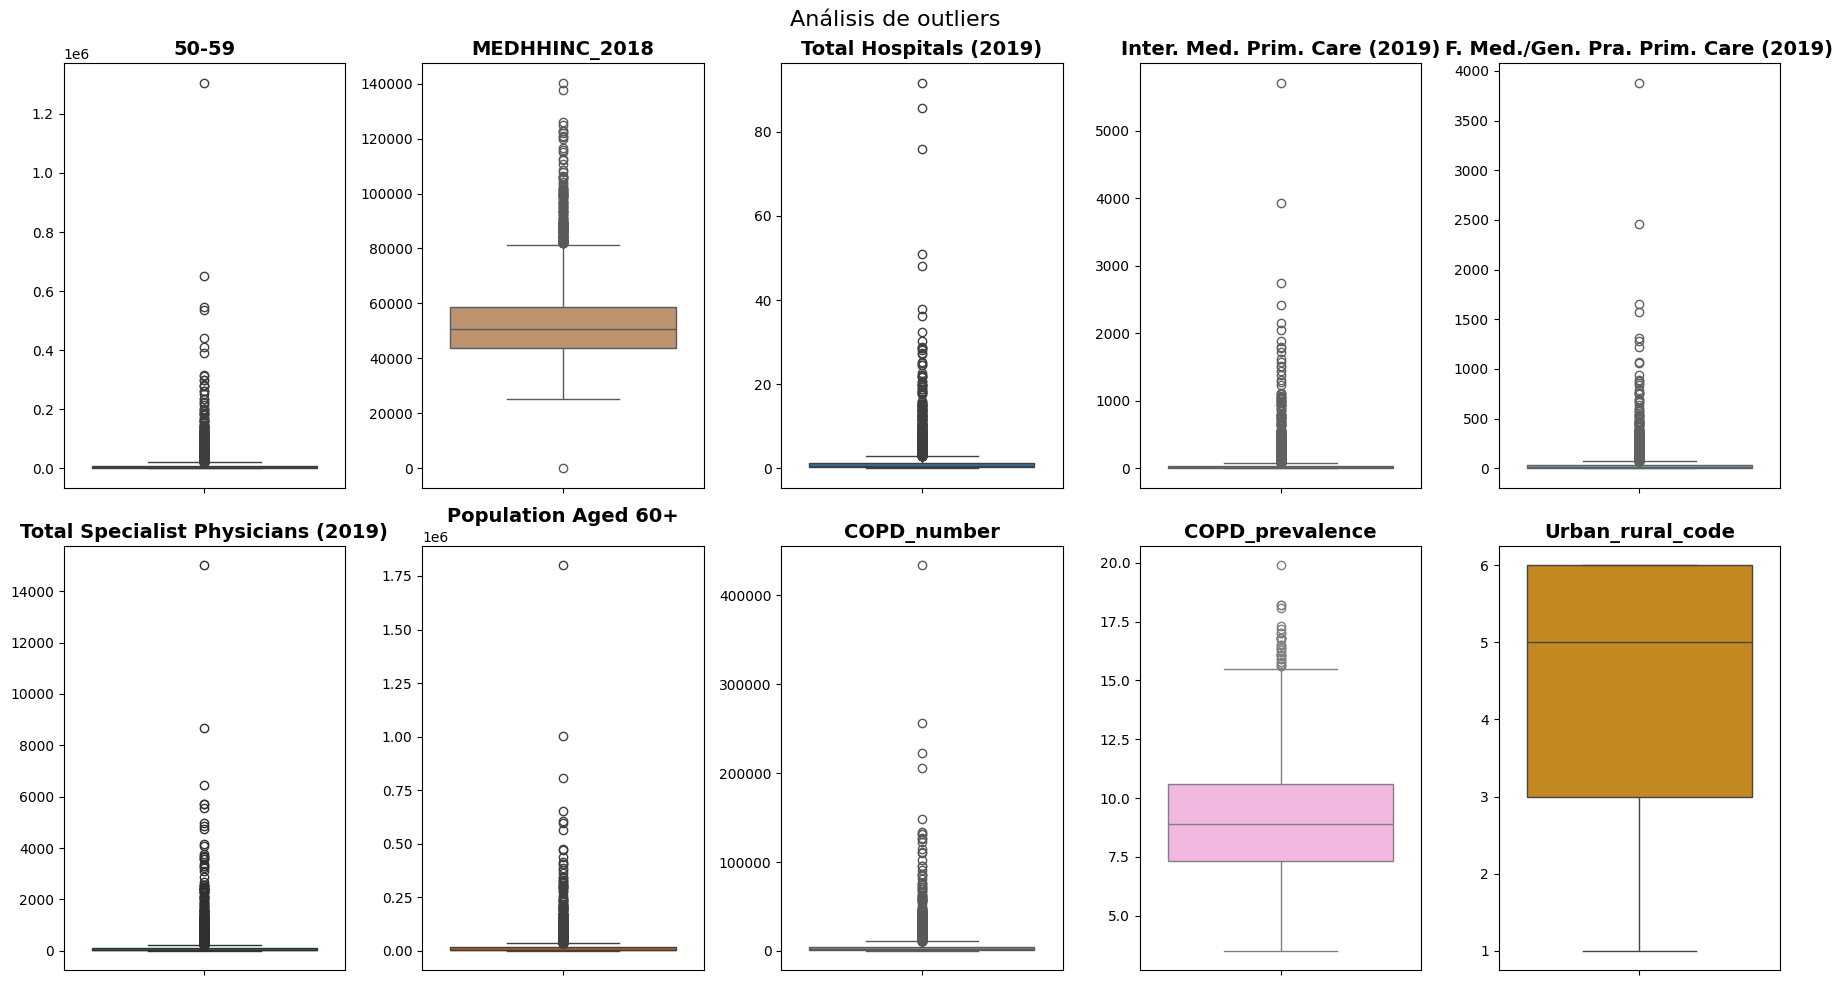

In [158]:
fig, axes = plt.subplots(2, 5, figsize = (18, 10))
fig.suptitle("Análisis de outliers", fontsize=16)

sns.boxplot(ax = axes[0, 0], data = df_enc, y = "50-59").set_title("50-59", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 1], data = df_enc, y = "MEDHHINC_2018", color=sns.color_palette("colorblind")[5]).set_title("MEDHHINC_2018", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 2], data = df_enc, y = "Total Hospitals (2019)").set_title("Total Hospitals (2019)", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 3], data = df_enc, y = "Internal Medicine Primary Care (2019)", color=sns.color_palette("colorblind")[4]).set_title("Inter. Med. Prim. Care (2019)", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 4], data = df_enc, y = "Family Medicine/General Practice Primary Care (2019)", color=sns.color_palette("colorblind")[9]).set_title("F. Med./Gen. Pra. Prim. Care (2019)", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 0], data = df_enc, y = "Total Specialist Physicians (2019)", color=sns.color_palette("colorblind")[2]).set_title("Total Specialist Physicians (2019)", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 1], data = df_enc, y = "Population Aged 60+", color=sns.color_palette("colorblind")[3]).set_title("Population Aged 60+", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 2], data = df_enc, y = "COPD_number", color=sns.color_palette("colorblind")[7]).set_title("COPD_number", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 3], data = df_enc, y = "COPD_prevalence", color=sns.color_palette("colorblind")[6]).set_title("COPD_prevalence", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 4], data = df_enc, y = "Urban_rural_code", color=sns.color_palette("colorblind")[1]).set_title("Urban_rural_code", fontsize=14, fontweight='bold')

for ax in axes.flatten():
    if ax: 
        ax.set(ylabel=None)

plt.tight_layout()
plt.show()

Analisis

In [159]:
#Creamos una copia sin outliers
df_enc_no = df_enc.copy()

In [160]:
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'../data/interim/outliers_lims_{feature_name}.json'
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, 'w') as f:
        json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, f)

    return x

In [161]:
df_enc_no['50-59'] = remove_outliers(df_enc_no['50-59'], '50-59')
df_enc_no['MEDHHINC_2018'] = remove_outliers(df_enc_no['MEDHHINC_2018'], 'MEDHHINC_2018')
df_enc_no['Total Hospitals (2019)'] = remove_outliers(df_enc_no['Total Hospitals (2019)'], 'Total Hospitals (2019)')
df_enc_no['Internal Medicine Primary Care (2019)'] = remove_outliers(df_enc_no['Internal Medicine Primary Care (2019)'], 'Internal Medicine Primary Care (2019)')
df_enc_no['Total Specialist Physicians (2019)'] = remove_outliers(df_enc_no['Total Specialist Physicians (2019)'], 'Total Specialist Physicians (2019)')
df_enc_no['Population Aged 60+'] = remove_outliers(df_enc_no['Population Aged 60+'], 'Population Aged 60+')
df_enc_no['COPD_number'] = remove_outliers(df_enc_no['COPD_number'], 'COPD_number')
df_enc_no['COPD_prevalence'] = remove_outliers(df_enc_no['COPD_prevalence'], 'COPD_prevalence')
df_enc_no['Family Medicine/General Practice Primary Care (2019)'] = remove_outliers(df_enc_no['Family Medicine/General Practice Primary Care (2019)'], 'Family Medicine/General Practice Primary Care (2019)')

# 5.2 Missing Values

In [162]:
df_enc.isna().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
COUNTY_NAME_encoded       0
STATE_NAME_encoded        0
Length: 108, dtype: int64

# 5.3 Split train/test of both Data Frames

In [163]:
def split(target, df, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [164]:
#Dividimos el data frame original
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('COPD_prevalence', df_enc)
X_train_without_outliers, X_test_without_outliers, _, _ = split('COPD_prevalence', df_enc_no)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

# 5.4 Normalization

In [165]:
def norm(X_train, X_test, reference: str):
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    dump(scaler, open(f'../data/interim/_{reference}.sav', 'wb'))

    return X_train_norm, X_test_norm

In [166]:
X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

# 5.5 Min-Max Scaling

In [167]:
def minmax(X_train, X_test, reference: str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    
    dump(scaler, open(f'../data/interim/minmax_{reference}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [168]:
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

# 6. Feature Selection

In [169]:
def kselection(X_train, X_test, y_train, k, reference: str):
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)
    cols = selection_model.get_support()

    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[cols]) 
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[cols])

    dump(selection_model, open(f'../data/interim/selection_model_{reference}.sav', 'wb'))

    return X_train_sel, X_test_sel  

In [170]:
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers, X_test_with_outliers, y_train, 34, 'with_outliers')
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers, X_test_without_outliers, y_train, 34, 'without_outliers')

# 6.1 Applying the filter to the normalized and minmax scaled data frames

In [171]:
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_with_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

# 6.2 Saving the CSV files

In [172]:
dfs_train = [X_train_with_outliers_sel, X_train_without_outliers_sel, 
             X_train_with_outliers_norm_sel, X_train_without_outliers_norm_sel, 
             X_train_with_outliers_minmax_sel, X_train_without_outliers_minmax_sel]

dfs_test = [X_test_with_outliers_sel, X_test_without_outliers_sel, 
            X_test_with_outliers_norm_sel, X_test_without_outliers_norm_sel, 
            X_test_with_outliers_minmax_sel, X_test_without_outliers_minmax_sel]

In [173]:
# Data frame de entrenamiento
X_train_with_outliers_sel.to_csv('../data/processed/X_train_with_outliers_sel.csv', index=False)
X_train_without_outliers_sel.to_csv('../data/processed/X_train_without_outliers_sel.csv', index=False)
X_train_with_outliers_norm_sel.to_csv('../data/processed/X_train_with_outliers_norm_sel.csv', index=False)
X_train_without_outliers_norm_sel.to_csv('../data/processed/X_train_without_outliers_norm_sel.csv', index=False)
X_train_with_outliers_minmax_sel.to_csv('../data/processed/X_train_with_outliers_minmax_sel.csv', index=False)
X_train_without_outliers_minmax_sel.to_csv('../data/processed/X_train_without_outliers_minmax_sel.csv', index=False)

# Data frame de prueba
X_test_with_outliers_sel.to_csv('../data/processed/X_test_with_outliers_sel.csv', index=False)
X_test_without_outliers_sel.to_csv('../data/processed/X_test_without_outliers_sel.csv', index=False)
X_test_with_outliers_norm_sel.to_csv('../data/processed/X_test_with_outliers_norm_sel.csv', index=False)
X_test_without_outliers_norm_sel.to_csv('../data/processed/X_test_without_outliers_norm_sel.csv', index=False)
X_test_with_outliers_minmax_sel.to_csv('../data/processed/X_test_with_outliers_minmax_sel.csv', index=False)
X_test_without_outliers_minmax_sel.to_csv('../data/processed/X_test_without_outliers_minmax_sel.csv', index=False)

# Machine Learning
# Logistic Regression Model

In [174]:
# Train data frames
X_train_with_outliers_sel = pd.read_csv('../data/processed/X_train_with_outliers_sel.csv')
X_train_without_outliers_sel = pd.read_csv('../data/processed/X_train_without_outliers_sel.csv')
X_train_with_outliers_norm_sel = pd.read_csv('../data/processed/X_train_with_outliers_norm_sel.csv')
X_train_without_outliers_norm_sel = pd.read_csv('../data/processed/X_train_without_outliers_norm_sel.csv')
X_train_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_with_outliers_minmax_sel.csv')
X_train_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_without_outliers_minmax_sel.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')

# Test data frames
X_test_with_outliers_sel = pd.read_csv('../data/processed/X_test_with_outliers_sel.csv')
X_test_without_outliers_sel = pd.read_csv('../data/processed/X_test_without_outliers_sel.csv')
X_test_with_outliers_norm_sel = pd.read_csv('../data/processed/X_test_with_outliers_norm_sel.csv')
X_test_without_outliers_norm_sel = pd.read_csv('../data/processed/X_test_without_outliers_norm_sel.csv')
X_test_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_with_outliers_minmax_sel.csv')
X_test_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_without_outliers_minmax_sel.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [175]:
train_dfs = [
  X_train_with_outliers_sel,
  X_train_without_outliers_sel,
  X_train_with_outliers_norm_sel,
  X_train_without_outliers_norm_sel,
  X_train_with_outliers_minmax_sel,
  X_train_without_outliers_minmax_sel
]
test_dfs = [
  X_test_with_outliers_sel,
  X_test_without_outliers_sel,
  X_test_with_outliers_norm_sel,
  X_test_without_outliers_norm_sel,
  X_test_with_outliers_minmax_sel,
  X_test_without_outliers_minmax_sel
]

results = []
models = []

for df_index in range(len(train_dfs)):
  model = LinearRegression()
  train_df = train_dfs[df_index]
  model.fit(train_df, y_train)
  y_train_pred = model.predict(train_df)
  y_test_pred = model.predict(test_dfs[df_index])

  results.append(
        {
            "index": df_index,
            "train_mse": root_mean_squared_error(y_train, y_train_pred),
            "test_mse": root_mean_squared_error(y_test, y_test_pred),
            "train_r2": r2_score(y_train, y_train_pred),
            "test_r2": r2_score(y_test, y_test_pred)
        }
    )
  models.append(model)
sorted(results, key=lambda x: x["train_mse"])

[{'index': 1,
  'train_mse': np.float64(0.048347397543916266),
  'test_mse': np.float64(0.05077990970568341),
  'train_r2': 0.999574826297207,
  'test_r2': 0.9995307046457892},
 {'index': 3,
  'train_mse': np.float64(0.048347397543916294),
  'test_mse': np.float64(0.05077990970569376),
  'train_r2': 0.999574826297207,
  'test_r2': 0.999530704645789},
 {'index': 5,
  'train_mse': np.float64(0.0483473975439163),
  'test_mse': np.float64(0.05077990970569327),
  'train_r2': 0.999574826297207,
  'test_r2': 0.999530704645789},
 {'index': 0,
  'train_mse': np.float64(0.04837706092895981),
  'test_mse': np.float64(0.05078680916346278),
  'train_r2': 0.9995743044093308,
  'test_r2': 0.9995305771109643},
 {'index': 2,
  'train_mse': np.float64(0.04837706092895982),
  'test_mse': np.float64(0.05078680916345823),
  'train_r2': 0.9995743044093308,
  'test_r2': 0.9995305771109644},
 {'index': 4,
  'train_mse': np.float64(0.04837706092895983),
  'test_mse': np.float64(0.05078680916345838),
  'train_r

In [176]:
print(f"Intercep (a): {models[1].intercept_}")
print(f"Coefficients (b1, b2): {models[1].coef_}")

Intercep (a): [-0.01544891]
Coefficients (b1, b2): [[-8.67143227e-04 -1.83632832e-04  5.52472058e-07  7.85922835e-05
  -3.52926132e-04  1.51426569e-03  2.85475025e-04  5.44741881e-04
  -1.60593711e-04  2.87308665e-03 -2.19355038e-03  7.29710066e-07
  -3.68452126e-08 -9.68868727e-08  5.25763119e-04 -6.68669223e-08
  -2.40929190e-04  6.06314212e-02 -2.57878970e-02 -3.49746773e-02
   2.87795085e-02 -2.02271237e-02 -8.65522246e-03  1.56837509e-01
  -3.77105756e-02 -1.05656938e-01  5.09318653e-01  4.88450412e-01
   1.98645744e-01 -9.83619324e-02 -9.92346744e-02  9.25444088e-02
  -9.40437338e-02 -3.04632906e-02]]


In [177]:
y_pred = model.predict(X_test_without_outliers_sel)
y_pred

array([[1157.92048168],
       [1268.14119534],
       [1003.50321289],
       [2496.71890559],
       [ 800.51049526],
       [1079.08340582],
       [1049.72723068],
       [ 810.629459  ],
       [1030.02208272],
       [ 984.48428223],
       [ 915.87372851],
       [1211.20678466],
       [ 806.86777484],
       [1283.14300689],
       [ 913.30764554],
       [1050.9917684 ],
       [1072.83334204],
       [1245.9786821 ],
       [1080.88782975],
       [ 934.71692655],
       [1114.7582994 ],
       [1118.99742687],
       [ 989.58882021],
       [ 890.68546647],
       [ 770.15903226],
       [1055.54217355],
       [1305.47268458],
       [1033.09889959],
       [ 750.24930549],
       [ 838.88955122],
       [ 855.11297662],
       [ 925.8324373 ],
       [ 914.20250985],
       [1476.77695307],
       [ 955.91408907],
       [1125.57475681],
       [ 824.88385343],
       [1216.79616335],
       [1078.71460718],
       [ 989.43876506],
       [ 829.98548582],
       [ 880.116

# Model Optimization

In [178]:
alpha = 1.0
lasso_model = Lasso(alpha = alpha)

lasso_model.fit(X_train_without_outliers_sel, y_train)

score = lasso_model.score(X_test_without_outliers_sel, y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)

Coefficients: [-0.00000000e+00 -0.00000000e+00 -2.33735586e-06  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  1.80316839e-02 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.61042842e-05
  1.72286687e-05 -8.99884275e-06  0.00000000e+00 -0.00000000e+00
  4.49157479e-03  0.00000000e+00  0.00000000e+00  4.04540350e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.00942201e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
R2 score: 0.9453949754028215


In [179]:
alpha = 1.0
ridge_model = Ridge(alpha = alpha)

ridge_model.fit(X_train_without_outliers_sel, y_train)

score = ridge_model.score(X_test_without_outliers_sel, y_test)
print("Coefficients:", ridge_model.coef_)
print("R2 score:", score)

Coefficients: [[-8.12843473e-04 -1.10189617e-04  5.50320854e-07  5.01189569e-05
  -3.36860068e-04  1.51449257e-03  3.59155767e-04  4.96715218e-04
  -5.40861586e-05  2.74347061e-03 -2.10758617e-03  7.16903988e-07
  -2.46783977e-08 -8.82760909e-08  6.65212362e-04 -9.36952401e-08
  -2.33566794e-04  5.99271601e-02 -2.53435385e-02 -3.46872303e-02
   2.39974284e-02 -1.81234758e-02 -5.95023319e-03  1.23785754e-01
  -2.21923245e-02 -8.81994657e-02  5.03976770e-01  4.92269552e-01
   1.57632659e-01 -7.53384401e-02 -8.07234042e-02  6.14782346e-02
  -6.68356886e-02 -2.57276892e-02]]
R2 score: 0.9995300216209815


In [180]:
alpha = 1.0
elasticnet_model = ElasticNet(alpha = alpha)

elasticnet_model.fit(X_train_without_outliers_sel, y_train)

score = elasticnet_model.score(X_test_without_outliers_sel, y_test)
print("Coefficients:", elasticnet_model.coef_)
print("R2 score:", score)

Coefficients: [-0.00000000e+00 -0.00000000e+00 -5.23330226e-07  0.00000000e+00
 -7.32252783e-03  1.77631114e-03  1.96741532e-02 -0.00000000e+00
  0.00000000e+00  2.89347642e-04  0.00000000e+00 -4.16045543e-05
  1.54661540e-05 -1.08499497e-05  0.00000000e+00  2.74174525e-06
  4.88486212e-03  1.87678110e-02  0.00000000e+00  2.67558070e-02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.16382287e-01  4.71101615e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
R2 score: 0.9667571018752765


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.855e+02, tolerance: 1.381e+00
  model = cd_fast.enet_coordinate_descent(


In [181]:
dump(ridge_model, open("../models/ridge_alpha-1.0.sav", "wb"))